In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('clickRatio_stroke.xlsx')
df.sort_values('tDateTime', inplace=True)
df.tDateTime = df.tDateTime.dt.date

In [24]:
#df_drop = df.drop_duplicates(subset='SerialNumber', keep='last')

In [5]:
click_NG = df[(df.iloc[:,4:9] <0.2).any(axis=1)].sort_values('SerialNumber')

In [7]:
click_NG.describe().iloc[:,3:8].round(2)#.to_excel('clickRatioNG_Asia_describe.xlsx')

,Button1_ClickRatio,Button2_ClickRatio,Button3_ClickRatio,Button4_ClickRatio,Button5_ClickRatio
count,110.00,110.00,110.00,110.00,110.00
mean,0.21,0.24,0.21,0.20,0.24
std,0.05,0.05,0.05,0.08,0.04
min,0.00,0.00,0.00,0.00,0.00
25%,0.18,0.25,0.19,0.18,0.24
50%,0.20,0.26,0.22,0.22,0.25
75%,0.25,0.27,0.25,0.25,0.26
max,0.29,0.29,0.28,0.30,0.30


In [31]:
df.columns

Index(['Reference', 'ItemNameType', 'SerialNumber', 'ProductName',
       'Button1_ClickRatio', 'Button2_ClickRatio', 'Button3_ClickRatio',
       'Button4_ClickRatio', 'Button5_ClickRatio', 'Button1_Stroke',
       'Button2_Stroke', 'Button3_Stroke', 'Button4_Stroke', 'Button5_Stroke',
       'tDateTime'],
      dtype='object')

In [12]:
stroke_NG = df[((df.iloc[:,9:14]<0.2) | (df.iloc[:,9:14]>0.5)).any(axis=1)].sort_values('SerialNumber')

In [32]:
stroke_NG_button4 = df[~df.iloc[:,12].between(0.2,0.5)].sort_values('SerialNumber')

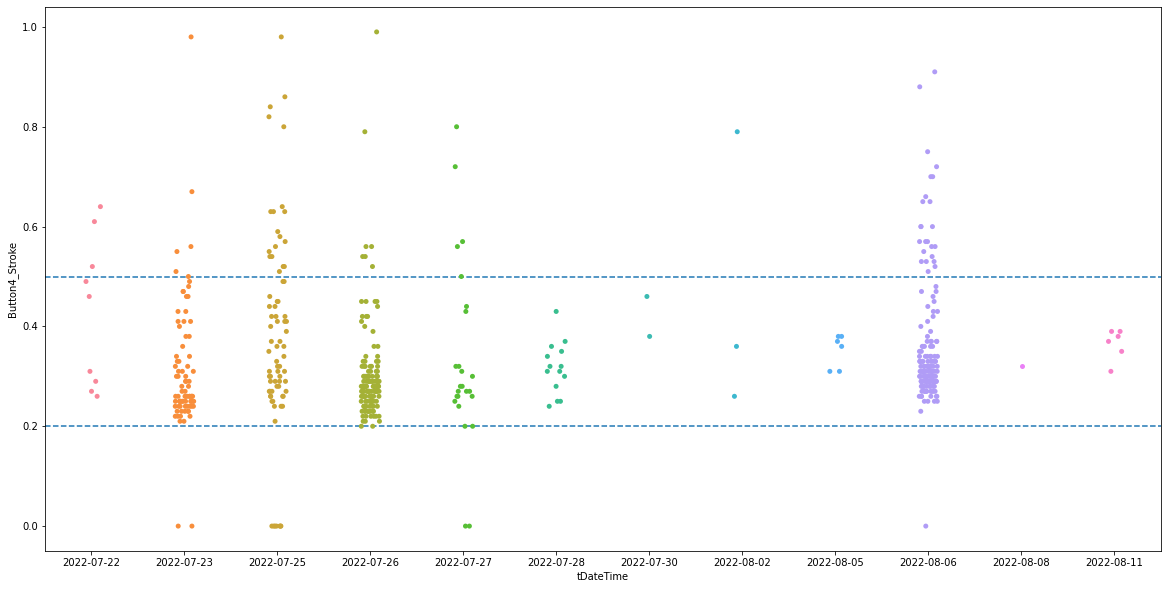

In [9]:
plt.figure(figsize=(20,10))
sns.stripplot(data=df, x='tDateTime', y='Button4_Stroke')
plt.axhline(0.2, ls='--')
plt.axhline(0.5, ls='--')
plt.savefig('Button4_Stroke_stripplot',bbox_inches = "tight", facecolor='white', transparent=False, dpi=300)

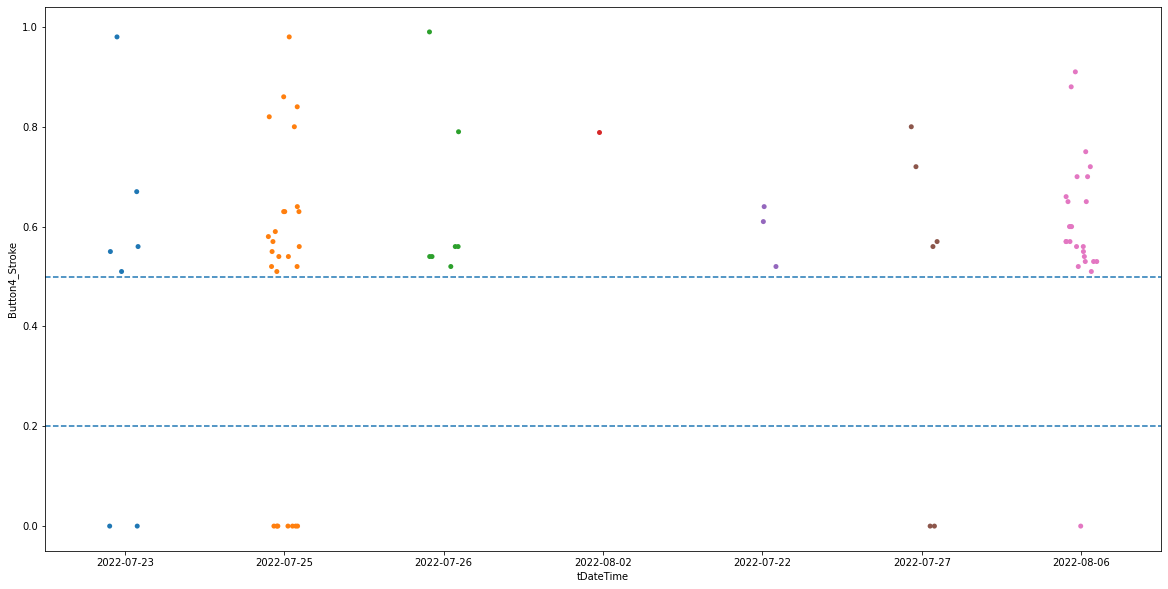

: 

In [34]:
plt.figure(figsize=(20,10))
sns.stripplot(data=stroke_NG_button4, x='tDateTime', y='Button4_Stroke')
plt.axhline(0.2, ls='--')
plt.axhline(0.5, ls='--')
#plt.savefig('Button4_Stroke_last_stripplot',bbox_inches = "tight", facecolor='white', transparent=False, dpi=300)

In [30]:
stroke_NG_button4 = stroke_NG[['SerialNumber','Button4_Stroke']]